# Importing all the libraries

In [1]:
## Importing all the Libraries ##
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as nplin

# Defining all the functions

In [11]:
def find_eigenvalues(H_floquet, omega):

    eigenvals, eigenvects = nplin.eig(H_floquet)
    eigenvals = eigenvals.real

    abs_eigenvals = np.abs(eigenvals)
    min_eigenvalue = float('%.3f'%np.amin(abs_eigenvals))
    bounded_eigenvals = []
    index_eigenvals = []
    
   

    for i in range(len(eigenvals)):
        i_eigenval = float('%.3f'%(eigenvals[i]))


        if (i_eigenval == min_eigenvalue):

            bounded_eigenvals.append(eigenvals[i])
            index_eigenvals.append(i)

    #print(bounded_eigenvals)
    max_eigenvalue = bounded_eigenvals[0]
  
    max_eigenvector = eigenvects[:,index_eigenvals[0]]


    for i in range(len(max_eigenvector)):
        if np.abs(max_eigenvector[i])< 10**(-4):
            max_eigenvector[i] = 0

    return max_eigenvalue, max_eigenvector


def find_fourier_coeff(eigenvector, N_max):
    a_coeff = np.array([], dtype = np.complex_)
    b_coeff = np.array([], dtype = np.complex_)
    c_coeff = np.array([], dtype = np.complex_) # This array is in terms of the a's and b's coefficients

  # Finding the a's and b's coefficients first for the Floquet Modes
    for i in range(len(eigenvector)):
        if (i%2 == 0):
            a_coeff = np.append(a_coeff, eigenvector[i])
        elif(i%2 != 0):
            b_coeff = np.append(b_coeff, eigenvector[i])


    for l in range(N_max, -N_max-1, -1):
        temp = 0
        for m in range(N_max, -N_max-1, -1): # For Loop for the conjugated one
            for n in range(N_max, -N_max-1, -1): #For Loop for the non-conjugated one
                if(-m+n == l):
        
                    temp += (a_coeff[N_max-m].conj()*a_coeff[N_max-n] - b_coeff[N_max-m].conj()*b_coeff[N_max-n])
      
        if np.abs(temp) < 10**(-4):
            temp = 0
            c_coeff = np.append(c_coeff, temp)
        else:
            c_coeff = np.append(c_coeff, temp)
 


    return a_coeff, b_coeff, c_coeff


def mz_time(c_coeff, time, N_max, omega):

    mz_arr = []

    c_coeff = c_coeff.flatten(order='C')

    for t in time:
        result = 0
        for i in range(len(c_coeff)):
              result += c_coeff[i]*np.exp(complex(0, omega*(N_max-i)*t))
 
        mz_arr.append(result)

    return mz_arr
  

def mx_time(a_coeff, b_coeff, time, N_max, omega):
    mx_arr = []
    
    for t in time:
        result_a = 0
        result_b = 0
        result_a_conj = 0
        result_b_conj = 0
        total_result = 0

    for i in range(len(a_coeff)):
        result_a += a_coeff[i]*np.exp(complex(0, omega*(N_max-i)*t))
        result_b += b_coeff[i]*np.exp(complex(0, omega*(N_max-i)*t))
        result_a_conj += a_coeff[i].conj()*np.exp(complex(0, -omega*(N_max-i)*t))
        result_b_conj += b_coeff[i].conj()*np.exp(complex(0, -omega*(N_max-i)*t))
      
    
    total_result += ((result_a_conj*result_b) + (result_b_conj*result_a))
    mx_arr.append(total_result)

    return mx_arr


def my_time(a_coeff, b_coeff, time, N_max, omega):
    my_arr = []

    for t in time:
        result_a = 0
        result_b = 0
        result_a_conj = 0
        result_b_conj = 0
        total_result = 0

        for i in range(len(a_coeff)):
            result_a += a_coeff[i]*np.exp(complex(0, omega*(N_max-i)*t))
            result_b += b_coeff[i]*np.exp(complex(0, omega*(N_max-i)*t))
            result_a_conj += a_coeff[i].conj()*np.exp(complex(0, -omega*(N_max-i)*t))
            result_b_conj += b_coeff[i].conj()*np.exp(complex(0, -omega*(N_max-i)*t))
      
    
        total_result += ((result_a_conj*complex(0,-1)*result_b) + (result_b_conj*complex(0,1)*result_a))
        my_arr.append(total_result)

    return my_arr



def floquet_hamiltonian(c_array, N_max, Bx, qJ): # Creating the Floquet Hamiltonian Matrix

    c_array = np.array(c_array) # Assigning the initial array
    H_floquet = np.zeros((1, col_size), dtype=np.complex_)
    count_row = 0


    for i in range(N_max, -N_max-1,-1): # This the i in j+k, and j+k has to equal to i

    # For the a coefficients first
    
        temp_row_a = np.zeros((col_size), dtype = np.complex_) # to store the a's and b's
        temp_row_b = np.zeros((col_size), dtype = np.complex_) # Ini bentuknya itu kaya [0,0,0,0,0,...,0] bukan [[0,0,0,0,...,0]]
        count_1 = 0
        for j in range(N_max, -N_max-1, -1): # This is looping for the coefficients in a
            for k in range(N_max, -N_max-1, -1): # This is looping for the coefficients in c
                if j+k == i:

                    if(j == i):
                        temp_row_a[N_max-j+count_1] = qJ*c_array[0, N_max-k]+(i*h_bar*omega)
                        temp_row_b[N_max-j+count_1+1] = -1*qJ*c_array[0, N_max-k]+(i*h_bar*omega)
                    else:
                        temp_row_a[N_max-j+count_1] = qJ*c_array[0, N_max-k]
                        temp_row_b[N_max-j+count_1+1] = -1*qJ*c_array[0, N_max-k]

            count_1 += 1
    

        count_2 = 1
        for j in range(N_max, -N_max-1,-1): # This is looping for the coefficients in b but in the same temp_row

            if(np.abs(j-i) == 1):

                temp_row_a[N_max-j+count_2] = Bx
                temp_row_b[N_max-j+count_2-1] = Bx

            count_2 += 1

        H_floquet = np.vstack([H_floquet, temp_row_a])
        H_floquet = np.vstack([H_floquet, temp_row_b])

    H_floquet = H_floquet[1:]

    return H_floquet
 

def check_symmetric(a, tol=1e-4): # Check whether the Hamiltonian is a hermitian or not
    return np.all(np.abs(a-a.conj().T) < tol)

def check_c_same(c_coeff_prev, c_coeff_now, tol=1e-4): # This is to check if the prev and present c_coeff is the same or not
    return np.all(np.abs(c_coeff_now - c_coeff_prev) < tol)



# Fixed Point Iterartion by using the Floquet Hamiltonian

In [14]:
## Some variables ##

N_max = 60
c_coeff_arr = [] 
iter_arr = []
quasi_arr = []

omega_arr = [20] # The list of omega that you want to test

mx_avg_arr = []
my_avg_arr = []
mz_avg_arr = []

total_mx_arr = []
total_my_arr = []
total_mz_arr = []

total_mx_time = []
total_my_time = []
total_mz_time = []


for omega in omega_arr:
    print("This is the omega value:", omega)
    
    Bx_arr = np.arange(0.1, 12.3, 0.2)
    h_bar = 1
    qJ = 2
    period = (2*np.pi)/omega
    mx_avg_arr = []
    my_avg_arr = []
    mz_avg_arr = []
    
    
    ## Creating the initial guess with Mz(t) = 1 ##
    row_size = 2*(2*N_max + 1)
    col_size = 2*(2*N_max + 1)
    c_array_init = np.zeros((1,int(col_size/2)),dtype=np.complex_)
    count = 2
    for i in range(int(col_size/2)):

        if(i == N_max):
            c_array_init[0,i] = complex(1,0)
        elif(i > N_max):
            c_array_init[0,i] = np.conj(c_array_init[0,i-count])
            count += 2
        else:
            c_array_init[0,i] = complex(0, 0)
        
        
    for Bx in Bx_arr:
        Bx = float('%.1f'%(Bx))
        print("This is this Bx:", Bx)
        



        c_prev = np.copy(c_array_init)

        H_floquet = floquet_hamiltonian(c_prev, N_max, Bx, qJ)

        condition_hermit = False
        condition_c_coeff = False


        counter = 0 # To count the number of iteration

        quasienergy_prev = -999
        quasienergy_new = 999

    

        while( ((condition_hermit == False) or (np.abs(quasienergy_prev-quasienergy_new) > 1e-4) or (condition_c_coeff == False)) and counter < 10000):

            quasienergy_prev = quasienergy_new

            c_prev = np.copy(c_array_init)
            H_floquet = floquet_hamiltonian(c_array_init, N_max, Bx, qJ)
            max_eigenvalue, max_eigenvector= find_eigenvalues(H_floquet, omega)

            quasienergy_new = max_eigenvalue
            quasi_arr.append(quasienergy_new)

            
            # Finding the c coefficients for m_z(t) 
            a_coeff, b_coeff, c_coeff = find_fourier_coeff(max_eigenvector, N_max)

            # Generating the new guess using SUR/SOR 
            c_array_init = np.array([c_coeff])*0.68+ c_prev*(0.32) # Generating the new guess for the next iteration


            H_floquet = floquet_hamiltonian(c_array_init, N_max, Bx, qJ)

            condition_hermit = check_symmetric(H_floquet)
            condition_c_coeff = check_c_same(c_prev, c_array_init)


            iter_arr.append(counter)
            counter += 1


        print("Bx:", Bx, "has finished iterating!")
        c_coeff_arr.append(c_array_init)

        time_arr = np.arange(0,period, 0.001)

        mz = mz_time(c_array_init, time_arr, N_max, omega)
        mz_avg = np.average(mz)
        mz_avg_arr.append(mz_avg)
        total_mz_time.append(mz)

        mx = mx_time(a_coeff, b_coeff, time_arr, N_max, omega)
        mx_avg = np.average(mx)
        mx_avg_arr.append(mx_avg)
        total_mx_time.append(mx)
        
        my = my_time(a_coeff, b_coeff, time_arr, N_max, omega)
        my_avg = np.average(my)
        my_avg_arr.append(my_avg)
        total_my_time.append(my)
        
        print()

    
    
    total_mz_arr.append(mz_avg_arr)
    print("This", omega, "is added to the total_mz_arr array")
    total_mx_arr.append(mx_avg_arr)
    print("This", omega, "is added to the total_mx_arr array")
    total_my_arr.append(my_avg_arr)
    print("This", omega, "is added to the total_my_arr array")
    print("\n")





This is the omega value: 20
This is this Bx: 0.1
Bx: 0.1 has finished iterating!

This is this Bx: 0.3
Bx: 0.3 has finished iterating!

This is this Bx: 0.5
Bx: 0.5 has finished iterating!

This is this Bx: 0.7
Bx: 0.7 has finished iterating!

This is this Bx: 0.9
Bx: 0.9 has finished iterating!

This is this Bx: 1.1
Bx: 1.1 has finished iterating!

This is this Bx: 1.3
Bx: 1.3 has finished iterating!

This is this Bx: 1.5
Bx: 1.5 has finished iterating!

This is this Bx: 1.7
Bx: 1.7 has finished iterating!

This is this Bx: 1.9
Bx: 1.9 has finished iterating!

This is this Bx: 2.1
Bx: 2.1 has finished iterating!

This is this Bx: 2.3
Bx: 2.3 has finished iterating!

This is this Bx: 2.5
Bx: 2.5 has finished iterating!

This is this Bx: 2.7
Bx: 2.7 has finished iterating!

This is this Bx: 2.9
Bx: 2.9 has finished iterating!

This is this Bx: 3.1
Bx: 3.1 has finished iterating!

This is this Bx: 3.3
Bx: 3.3 has finished iterating!

This is this Bx: 3.5
Bx: 3.5 has finished iterating!



# Plotting some functions

/Users/michaelalexander/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


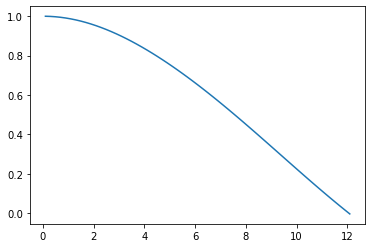

In [17]:
plt.plot(Bx_arr, total_mz_arr[0])